In [1]:
# !pip install pandas
# !pip install matplotlib
# # !pip install seaborn
# !pip install scikit-learn
# !pip install imbalanced-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report

In [3]:
dataset=pd.read_csv("ccfd.csv")
dataset.head()

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,Fixed,Female,Married,Graduate,1970,52,Employed,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,Variable,Male,Single,High School,1980,42,Unemployed,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,Fixed,Male,Single,Post Graduate,1990,32,Self-Employed,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,Fixed,Female,Divorced,Doctorate,1975,47,Employed,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,Variable,Other,Divorced,Post Graduate,1985,37,Unemployed,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [4]:
N=dataset.shape
print(N)

(990, 31)


In [5]:
dataset.isnull().sum()

Id                               0
Contract_Type                    0
Gender                           0
Marital_Status                   0
Education_Level                  0
Birth_Year                       0
Age                              0
Employment                       0
Mobile_Number                    0
Card_Number                      0
Card_Expiry                      0
Transaction_Device_Type          0
Card_Limit                       0
Transaction_Amount               0
Transaction_Type                 0
Transaction_Location             0
Card_Type                        0
Card_Verification_Method         0
Monthly_Income                   0
Annual_Income                    0
EMI_Amount                       0
Previous_Transaction_Count       0
Transaction_Hour                 0
Is_Foreign_Transaction           0
Is_High_Transaction_Amount       0
Merchant_Risk_Score              0
Card_Usage_Location_Distance     0
Has_Recent_Card_Update           0
Transaction_Frequenc

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             990 non-null    int64  
 1   Contract_Type                  990 non-null    object 
 2   Gender                         990 non-null    object 
 3   Marital_Status                 990 non-null    object 
 4   Education_Level                990 non-null    object 
 5   Birth_Year                     990 non-null    int64  
 6   Age                            990 non-null    int64  
 7   Employment                     990 non-null    object 
 8   Mobile_Number                  990 non-null    int64  
 9   Card_Number                    990 non-null    int64  
 10  Card_Expiry                    990 non-null    int64  
 11  Transaction_Device_Type        990 non-null    object 
 12  Card_Limit                     990 non-null    int

In [7]:
dataset['Contract_Type'].unique()

array(['Fixed', 'Variable'], dtype=object)

In [8]:
dataset['Contract_Type'].replace(['Fixed', 'Variable'], [1, 2], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\1097441613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Contract_Type'].replace(['Fixed', 'Variable'], [1, 2], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\1097441613.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,Female,Married,Graduate,1970,52,Employed,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,Male,Single,High School,1980,42,Unemployed,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,Male,Single,Post Graduate,1990,32,Self-Employed,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,Female,Divorced,Doctorate,1975,47,Employed,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,Other,Divorced,Post Graduate,1985,37,Unemployed,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [9]:
dataset['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [10]:
dataset['Gender'].replace(['Male', 'Female', 'Other'], [1, 2,3], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\4160420591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].replace(['Male', 'Female', 'Other'], [1, 2,3], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\4160420591.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,Married,Graduate,1970,52,Employed,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,Single,High School,1980,42,Unemployed,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,Single,Post Graduate,1990,32,Self-Employed,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,Divorced,Doctorate,1975,47,Employed,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,Divorced,Post Graduate,1985,37,Unemployed,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [11]:
dataset['Marital_Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [12]:
dataset['Marital_Status'].replace(['Divorced', 'Widowed', 'Married', 'Single'], [1, 2, 3, 4], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\1722774482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Marital_Status'].replace(['Divorced', 'Widowed', 'Married', 'Single'], [1, 2, 3, 4], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\1722774482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,Graduate,1970,52,Employed,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,High School,1980,42,Unemployed,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,Post Graduate,1990,32,Self-Employed,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,Doctorate,1975,47,Employed,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,Post Graduate,1985,37,Unemployed,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [13]:
dataset['Education_Level'].unique()

array(['Graduate', 'High School', 'Post Graduate', 'Doctorate',
       'HighSchool'], dtype=object)

In [14]:
dataset['Education_Level'].replace(['Graduate', 'Post Graduate', 'High School', 'Doctorate','HighSchool'], [1, 2, 3, 4, 2], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\137789996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Education_Level'].replace(['Graduate', 'Post Graduate', 'High School', 'Doctorate','HighSchool'], [1, 2, 3, 4, 2], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\137789996.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,1,1970,52,Employed,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,3,1980,42,Unemployed,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,2,1990,32,Self-Employed,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,4,1975,47,Employed,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,2,1985,37,Unemployed,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [15]:
dataset['Employment'].unique()

array(['Employed', 'Unemployed', 'Self-Employed', 'SelfEmployed'],
      dtype=object)

In [16]:
dataset['Employment'].replace(['Employed', 'Unemployed', 'Self-Employed','SelfEmployed'], [1, 2, 3, 3], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2226664455.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Employment'].replace(['Employed', 'Unemployed', 'Self-Employed','SelfEmployed'], [1, 2, 3, 3], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2226664455.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,1,1970,52,1,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,3,1980,42,2,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,2,1990,32,3,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,4,1975,47,1,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,2,1985,37,2,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [17]:
dataset['Transaction_Device_Type'].unique()

array(['Desktop', 'Mobile', 'Tablet'], dtype=object)

In [18]:
dataset['Transaction_Device_Type'].replace(['Desktop', 'Mobile', 'Tablet'], [1, 2, 3], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2172912017.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Transaction_Device_Type'].replace(['Desktop', 'Mobile', 'Tablet'], [1, 2, 3], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2172912017.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,1,1970,52,1,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,3,1980,42,2,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,2,1990,32,3,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,4,1975,47,1,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,2,1985,37,2,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [19]:
dataset['Transaction_Type'].unique()

array(['Purchase', 'Withdrawal', 'Transfer'], dtype=object)

In [20]:
dataset['Transaction_Type'].replace(['Transfer', 'Withdrawal', 'Purchase'], [1, 2, 3], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\306091864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Transaction_Type'].replace(['Transfer', 'Withdrawal', 'Purchase'], [1, 2, 3], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\306091864.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,1,1970,52,1,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,3,1980,42,2,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,2,1990,32,3,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,4,1975,47,1,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,2,1985,37,2,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [21]:
dataset['Transaction_Location'].unique()

array(['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Pune', 'Chennai',
       'Hyderabad'], dtype=object)

In [22]:
dataset['Transaction_Location'].replace(['Delhi', 'Kolkata', 'Mumbai', 'Pune', 'Chennai', 'Hyderabad','Ahmedabad', 'Bangalore'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2825321316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Transaction_Location'].replace(['Delhi', 'Kolkata', 'Mumbai', 'Pune', 'Chennai', 'Hyderabad','Ahmedabad', 'Bangalore'], [1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2825321316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`.

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,1,1970,52,1,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,3,1980,42,2,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,2,1990,32,3,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,4,1975,47,1,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,2,1985,37,2,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [23]:
dataset['Card_Type'].unique()

array(['Visa', 'MasterCard'], dtype=object)

In [24]:
dataset['Card_Type'].replace(['MasterCard', 'Visa'], [1, 2], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2780066147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Card_Type'].replace(['MasterCard', 'Visa'], [1, 2], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\2780066147.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,1,1970,52,1,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,3,1980,42,2,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,2,1990,32,3,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,4,1975,47,1,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,2,1985,37,2,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [25]:
dataset['Card_Verification_Method'].unique()

array(['Online', 'Offline'], dtype=object)

In [26]:
dataset['Card_Verification_Method'].replace(['Online', 'Offline'], [1, 2], inplace=True)
dataset.head()

C:\Users\shash\AppData\Local\Temp\ipykernel_20164\1135244949.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Card_Verification_Method'].replace(['Online', 'Offline'], [1, 2], inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_20164\1135244949.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Previous_Transaction_Count,Transaction_Hour,Is_Foreign_Transaction,Is_High_Transaction_Amount,Merchant_Risk_Score,Card_Usage_Location_Distance,Has_Recent_Card_Update,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
0,1,1,2,3,1,1970,52,1,1111111111,2222222222222222,...,50,10,False,True,0.8,10,True,10,10,1
1,2,2,1,4,3,1980,42,2,3333333333,4444444444444444,...,10,15,True,False,0.7,20,False,20,15,0
2,3,1,1,4,2,1990,32,3,5555555555,6666666666666666,...,100,5,True,True,0.6,30,False,5,5,1
3,4,1,2,1,4,1975,47,1,7777777777,8888888888888888,...,150,20,False,False,0.5,40,True,40,20,0
4,5,2,3,1,2,1985,37,2,9999999999,0,...,200,1,True,True,0.4,50,True,5,25,1


In [27]:
dataset.describe()

,Id,Contract_Type,Gender,Marital_Status,Education_Level,Birth_Year,Age,Employment,Mobile_Number,Card_Number,...,Monthly_Income,Annual_Income,EMI_Amount,Previous_Transaction_Count,Transaction_Hour,Merchant_Risk_Score,Card_Usage_Location_Distance,Transaction_Frequency_Weekday,Transaction_Frequency_Weekend,Fraud_Status
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,9.900000e+02,9.900000e+02,...,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,505.196970,1.336364,1.957576,3.288889,2.351515,1976.521212,45.481818,1.759596,5.337961e+09,4.169255e+15,...,1.935404e+05,2.322485e+06,3996.969697,71.131313,14.358586,0.348424,69.969697,16.833333,28.328283,0.408081
std,286.446583,0.472704,0.790629,0.884296,0.971626,5.570674,5.570322,0.813675,3.271717e+09,2.267009e+15,...,2.221071e+05,2.665285e+06,1588.950379,23.929728,4.692754,0.253400,22.072797,8.959943,9.219177,0.491727
min,1.000000,1.000000,1.000000,1.000000,1.000000,1963.000000,30.000000,1.000000,1.234568e+08,0.000000e+00,...,5.000000e+04,6.000000e+05,2000.000000,10.000000,1.000000,0.020000,10.000000,5.000000,5.000000,0.000000
25%,258.250000,1.000000,1.000000,3.000000,1.000000,1972.000000,41.000000,1.000000,2.370569e+09,3.209848e+15,...,9.500000e+04,1.140000e+06,3000.000000,60.000000,10.000000,0.140000,70.000000,5.000000,20.000000,0.000000
50%,505.500000,1.000000,2.000000,3.000000,3.000000,1977.000000,45.000000,2.000000,4.309567e+09,3.209848e+15,...,1.300000e+05,1.560000e+06,4000.000000,80.000000,15.000000,0.300000,75.000000,20.000000,30.000000,0.000000
75%,752.750000,2.000000,3.000000,4.000000,3.000000,1981.000000,50.000000,2.000000,9.872064e+09,4.444444e+15,...,1.300000e+05,1.560000e+06,5000.000000,90.000000,18.000000,0.500000,80.000000,25.000000,35.000000,1.000000
max,1000.000000,2.000000,3.000000,4.000000,4.000000,1992.000000,59.000000,3.000000,1.000000e+10,1.000000e+16,...,1.110000e+06,1.332000e+07,10000.000000,200.000000,22.000000,0.980000,100.000000,40.000000,50.000000,1.000000


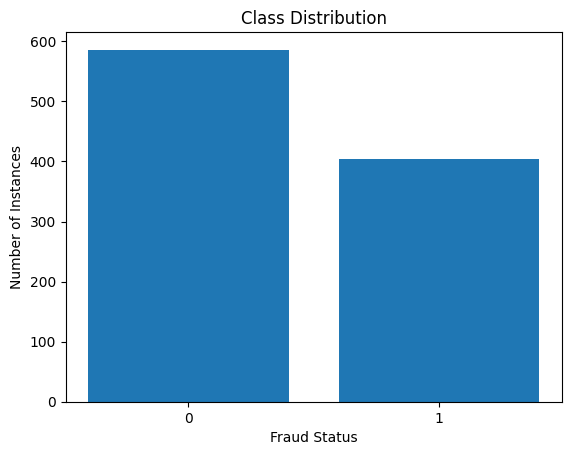

Fraud Status:
Fraud_Status
0    586
1    404
Name: count, dtype: int64
Imbalance Ratio: 1.4504950495049505


In [28]:
# Check For Data Unbalance
Fraud_Status_counts = dataset['Fraud_Status'].value_counts()
imbalance_ratio = Fraud_Status_counts[0] / Fraud_Status_counts[1]
plt.bar(Fraud_Status_counts.index, Fraud_Status_counts.values)
plt.xticks(Fraud_Status_counts.index)
plt.xlabel('Fraud Status')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

# Print class counts and imbalance ratio
print("Fraud Status:")
print(Fraud_Status_counts)
print("Imbalance Ratio:", imbalance_ratio)

In [29]:
# Checking for outliers in amount feature
# Annual_Income_column = dataset['Annual_Income']
# plt.figure(figsize=(6, 4))
# plt.boxplot(Annual_Income_column, vert=False)
# plt.title('Box Plot of Annual_Income Column')
# plt.xlabel('Annual_Income')
# plt.show()
# Q1 = Annual_Income_column.quantile(0.25)
# Q3 = Annual_Income_column.quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = Annual_Income_column[(Annual_Income_column < lower_bound) | (Annual_Income_column > upper_bound)]
# num_outliers = len(outliers)
# print("Number of Outliers:", num_outliers)
# print("Lower Bound:", lower_bound)
# print("Upper Bound:", upper_bound)

<Axes: >

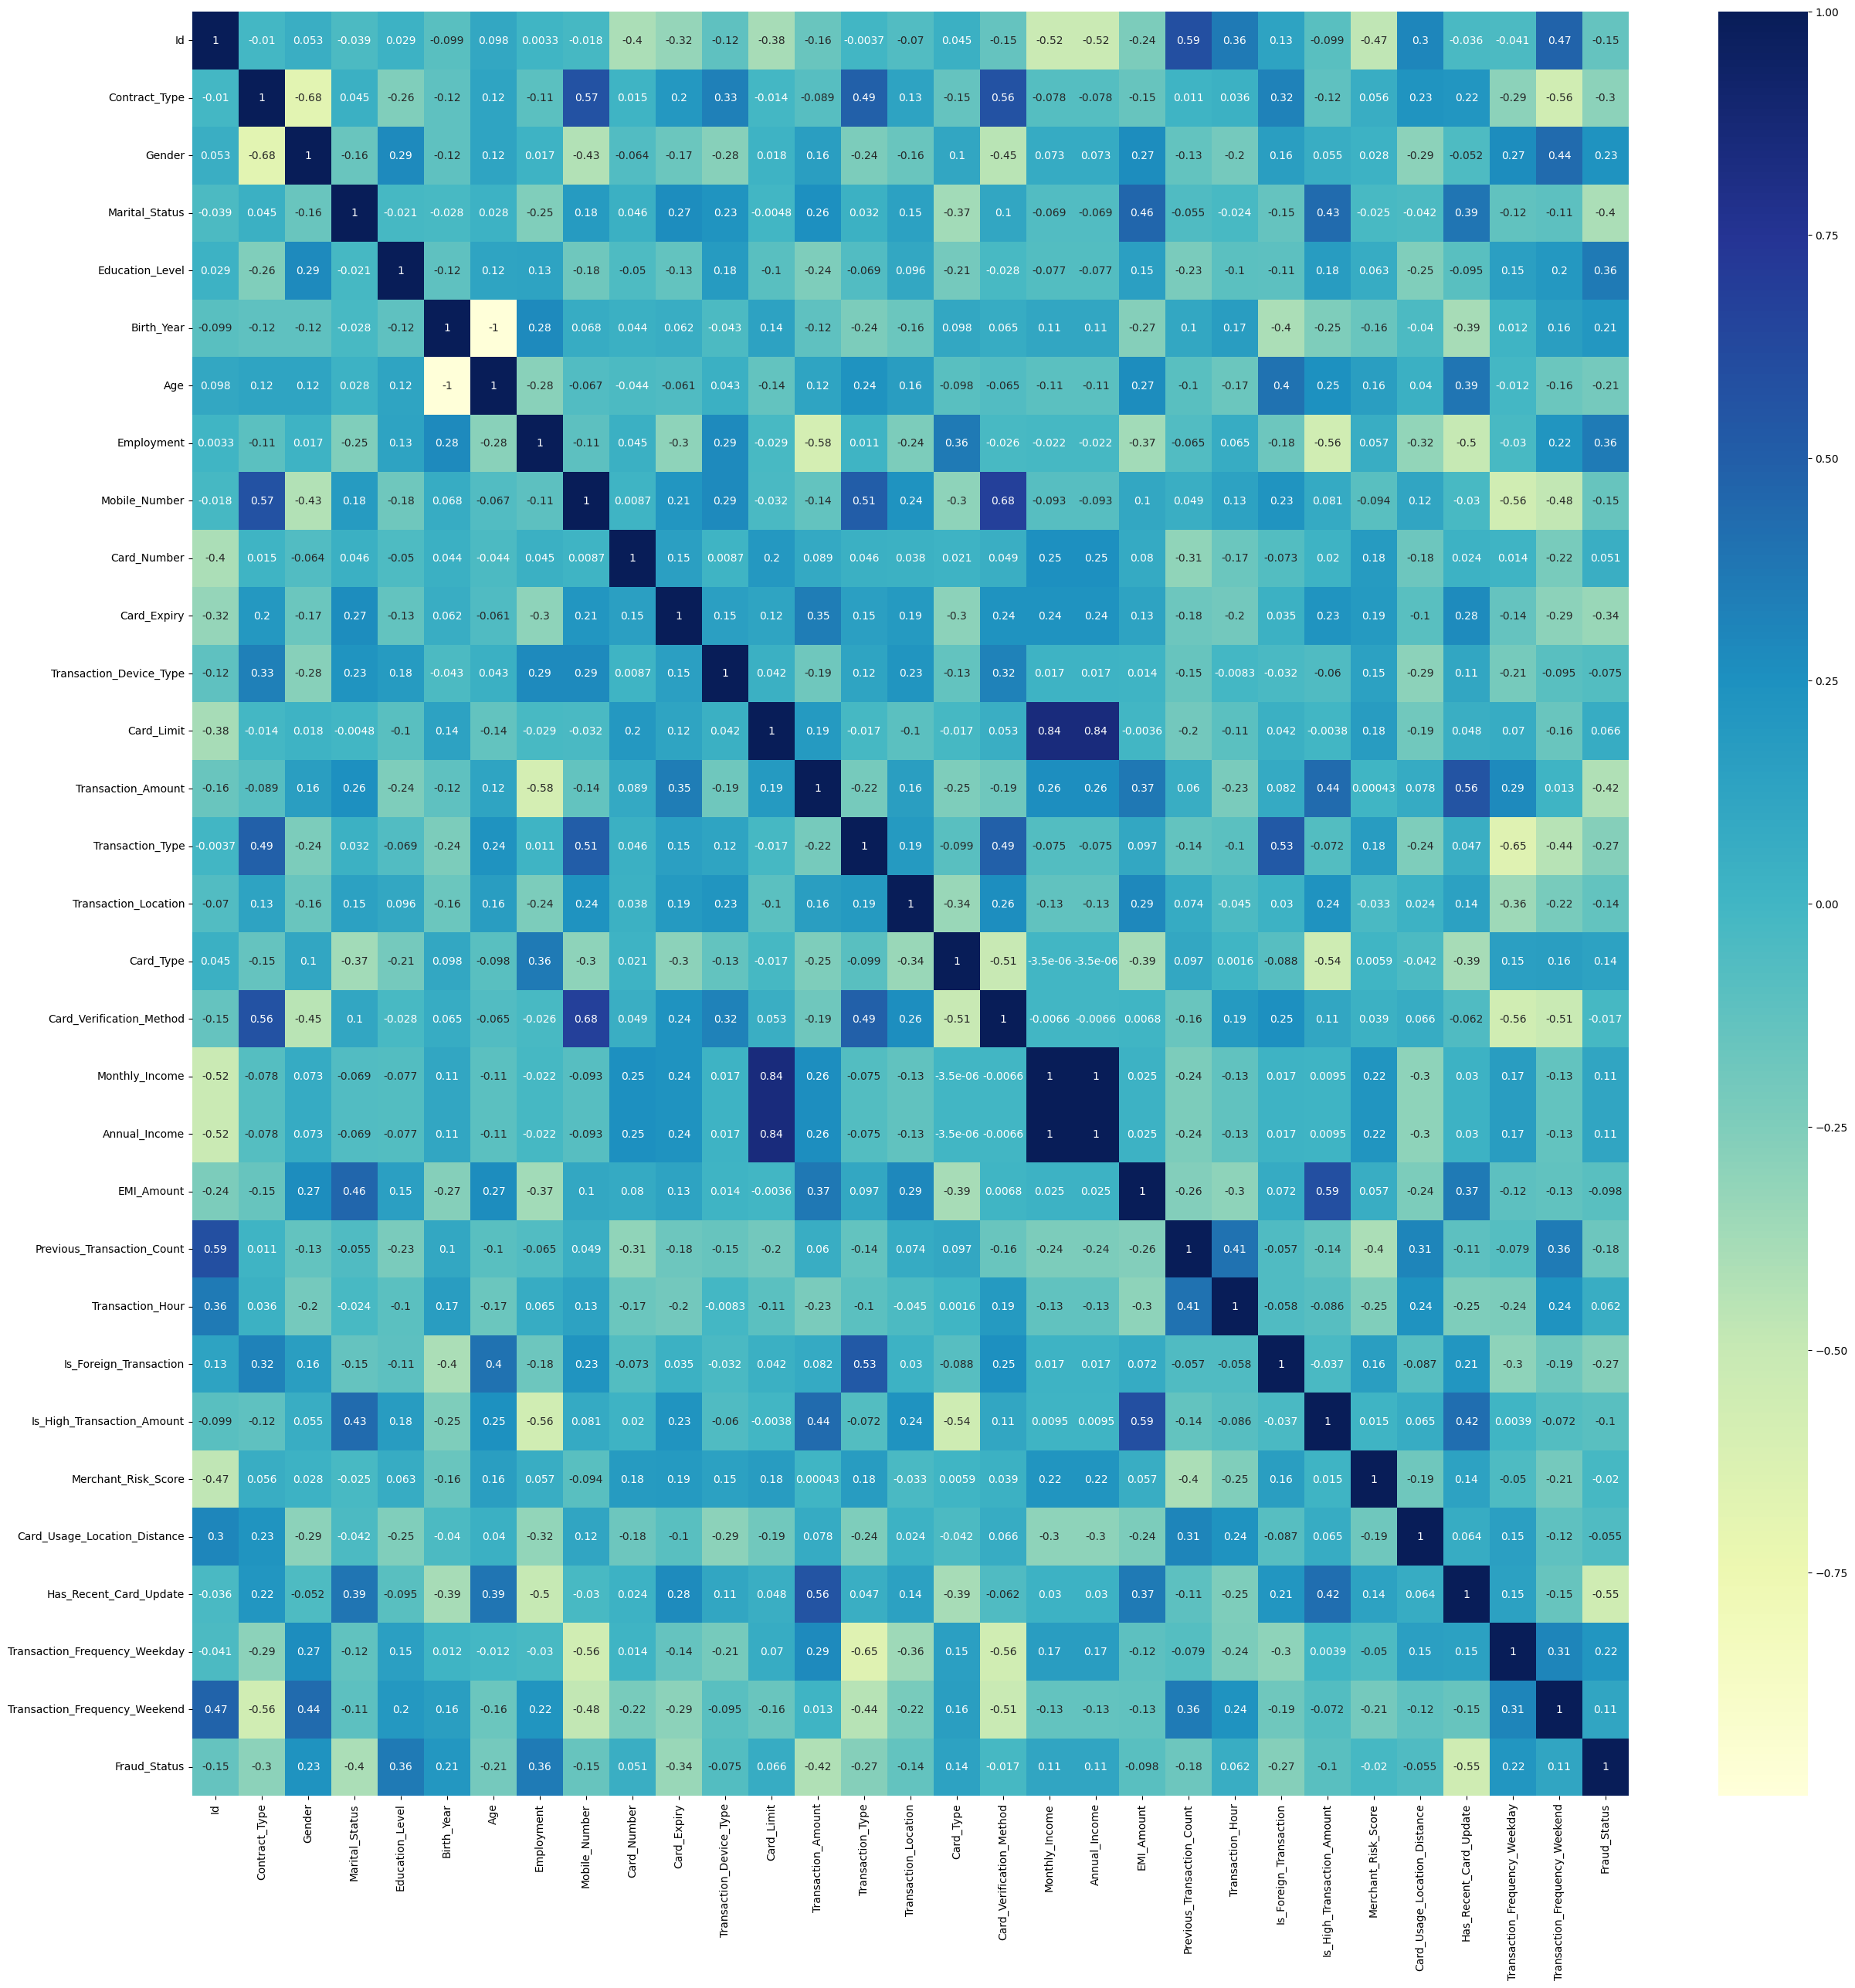

In [30]:
plt.figure(figsize=(30,30))
sns.heatmap(dataset.corr(),annot=True,cmap='YlGnBu')

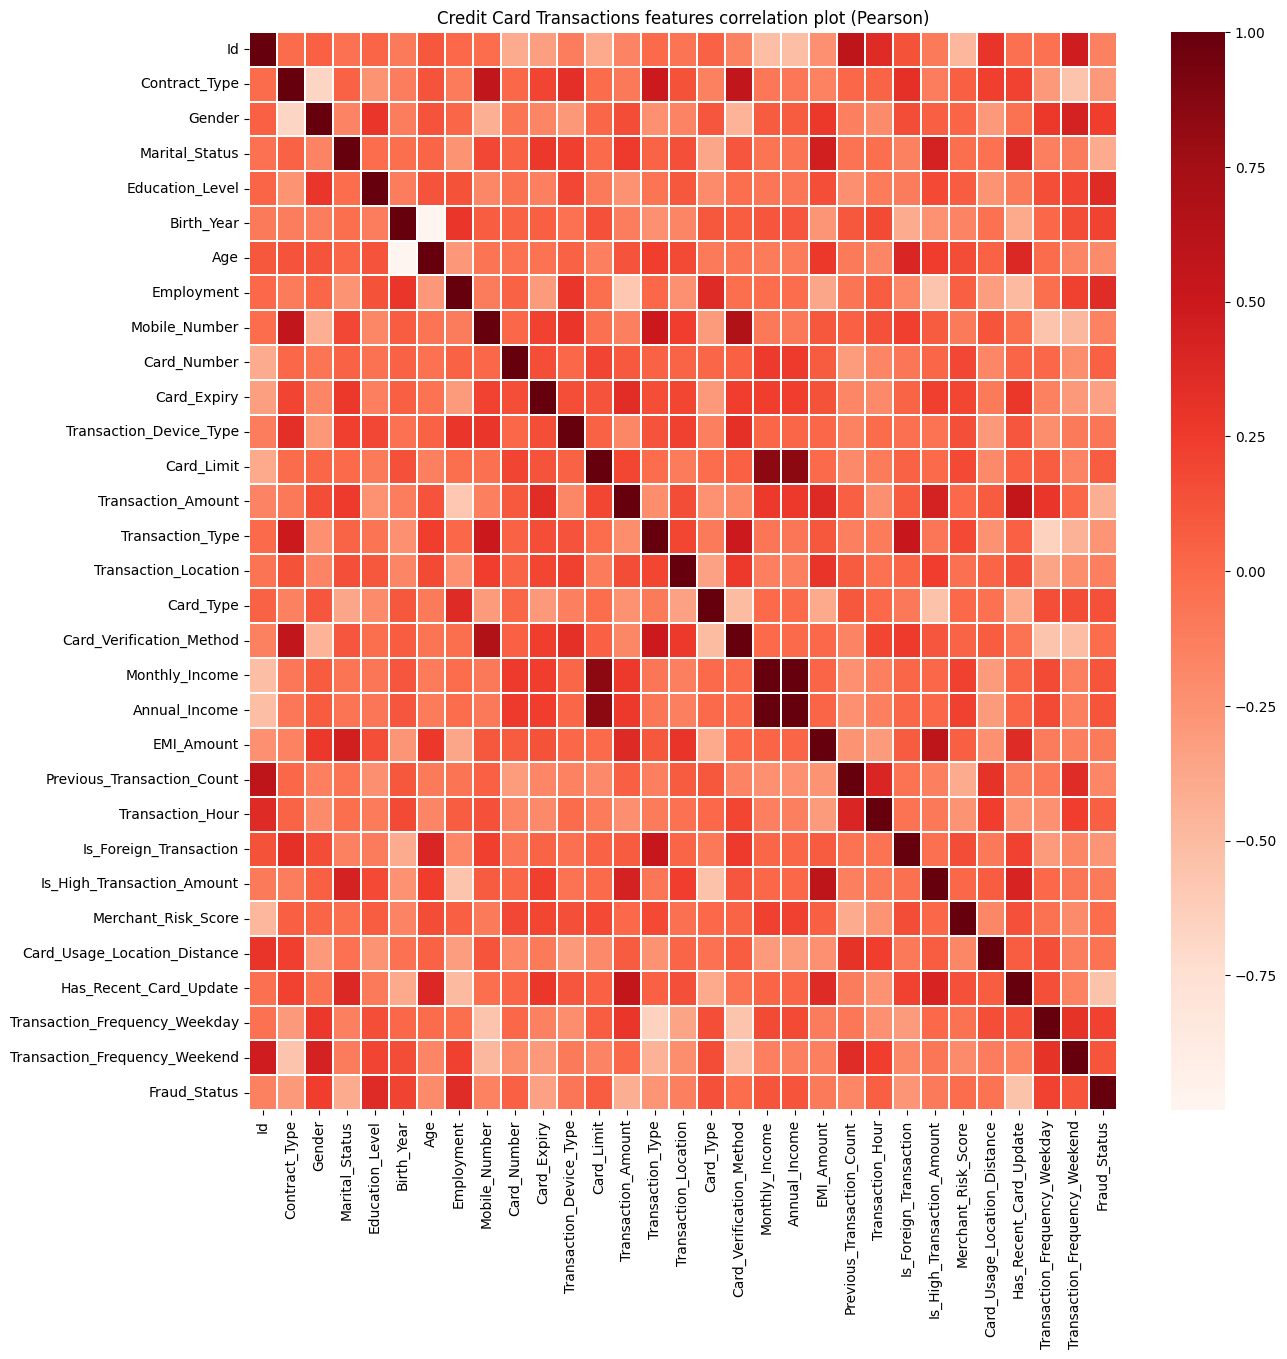

In [31]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = dataset.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Fraud Cases: 404
Valid Transactions: 586


Text(0.5, 1.0, 'Histogram')

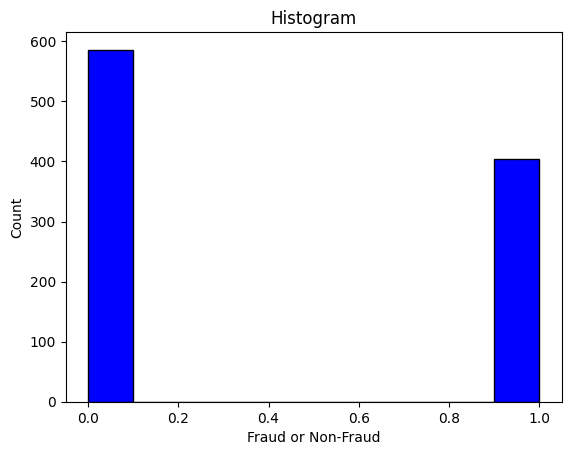

In [32]:
fraud=dataset[dataset['Fraud_Status']==1]
valid=dataset[dataset['Fraud_Status']==0]
print('Fraud Cases: {}'.format(len(dataset[dataset['Fraud_Status'] == 1])))
print('Valid Transactions: {}'.format(len(dataset[dataset['Fraud_Status'] == 0])))
plt.hist(dataset['Fraud_Status'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Fraud or Non-Fraud')
plt.ylabel('Count')
plt.title('Histogram')

Feature Selection

Identifying Independent And Dependent Variables

In [33]:
from sklearn.feature_selection import mutual_info_classif

In [34]:
mutual_info_classif

<function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>

In [35]:
Y = dataset["Fraud_Status"]
X= dataset.drop(columns=['Fraud_Status'])

In [36]:
score = mutual_info_classif(X,Y)
score

array([0.        , 0.04271635, 0.13827797, 0.09370367, 0.08353733,
       0.32685451, 0.35162581, 0.0830654 , 0.28279206, 0.05163167,
       0.2050994 , 0.01743504, 0.38527311, 0.26602179, 0.05328455,
       0.19257461, 0.00301857, 0.        , 0.08811043, 0.11712926,
       0.08852309, 0.05895977, 0.19116391, 0.06083103, 0.01250535,
       0.16364373, 0.08816225, 0.16274972, 0.        , 0.04689505])

In [37]:
imp_fea = pd.DataFrame(score,columns=['scores'])
imp_fea

,scores
0,0.000000
1,0.042716
2,0.138278
3,0.093704
4,0.083537
5,0.326855
6,0.351626
7,0.083065
8,0.282792
9,0.051632


Splitting the dataset into Training And Testing sets

In [38]:
Y = dataset["Fraud_Status"]
X= dataset.drop(columns=['Fraud_Status','Id','Contract_Type','Gender','Marital_Status','Education_Level','Birth_Year','Age','Transaction_Device_Type','Transaction_Type','Transaction_Location', 'Card_Type','EMI_Amount','Previous_Transaction_Count','Transaction_Hour','Is_High_Transaction_Amount','Merchant_Risk_Score','Card_Usage_Location_Distance','Has_Recent_Card_Update'])
print(X.shape)
print(Y.shape)
xdataset=X.values
ydataset=Y.values

(990, 12)
(990,)


In [39]:
xTrain, xTest, yTrain, yTest = train_test_split(xdataset, ydataset, test_size = 0.3, random_state =100)
print(xTest.shape)
print(yTest.shape)

(297, 12)
(297,)


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Id                             990 non-null    int64  
 1   Contract_Type                  990 non-null    int64  
 2   Gender                         990 non-null    int64  
 3   Marital_Status                 990 non-null    int64  
 4   Education_Level                990 non-null    int64  
 5   Birth_Year                     990 non-null    int64  
 6   Age                            990 non-null    int64  
 7   Employment                     990 non-null    int64  
 8   Mobile_Number                  990 non-null    int64  
 9   Card_Number                    990 non-null    int64  
 10  Card_Expiry                    990 non-null    int64  
 11  Transaction_Device_Type        990 non-null    int64  
 12  Card_Limit                     990 non-null    int

In [41]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(xTrain, yTrain)

Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters and their search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define model
RFC = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(RFC, param_grid, cv=5)
grid_search.fit(xTrain, yTrain)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate model with best hyperparameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(xTest, yTest)
print("Accuracy with Best Hyperparameters:", accuracy)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy with Best Hyperparameters: 0.9191919191919192


Predictive Models

0.9292929292929293
0.9646017699115044
0.8650793650793651
[[167   4]
 [ 17 109]]
0.9121338912133892
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       171
           1       0.96      0.87      0.91       126

    accuracy                           0.93       297
   macro avg       0.94      0.92      0.93       297
weighted avg       0.93      0.93      0.93       297



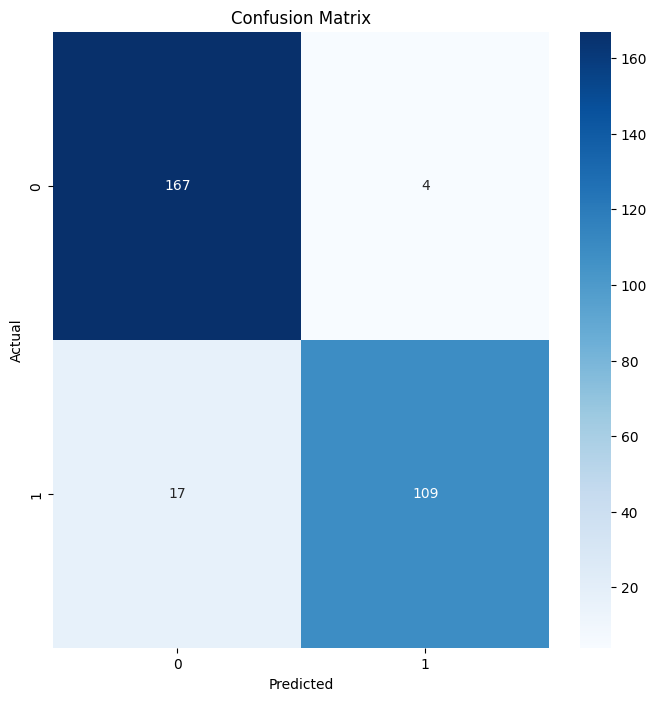

In [43]:
# Random Forest Classifier
RFC=RandomForestClassifier()
#RFC.fit(X_train_resampled, y_train_resampled)
RFC.fit(xTrain,yTrain)
ypred=RFC.predict(xTest)
accuracy=accuracy_score(yTest,ypred)
print(accuracy)
precision = precision_score(yTest, ypred, average='binary')
print(precision)
recall = recall_score(yTest, ypred)
print(recall)
cm = confusion_matrix(yTest, ypred)
print(cm)
f1 = f1_score(yTest, ypred)
print(f1)
cr=classification_report(yTest, ypred)
print(cr)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Pickle conversion

In [44]:
import pickle
with open('ccfd.pkl','wb') as files:
    pickle.dump(RFC,files)